In [3]:
## Python script aimed at 3 objectives:

## 1. Identify overall tissue distribution of key E3 ubiquitin ligases for PROTAC development
## 2. Identify cell line expression of key E3 ubiquitin ligases for PROTAC development
## 3. Identify the 'best' E3 ubiquitin ligase for a pair of drug targets

In [4]:
### 1. Identify overall tissue distribution of key ligases for PROTAC development

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch


## Importing data in TSV format from protein genome atlas ##

r_filenameTSV = 'https://www.proteinatlas.org/download/rna_tissue_consensus.tsv.zip'
w_filenameTSV = 'https://www.proteinatlas.org/download/rna_tissue_consensus.tsv.zip'
tsv_read_Tissue = pd.read_csv(r_filenameTSV, sep='\t')
print(tsv_read_Tissue.head(10))

              Gene Gene name           Tissue  nTPM
0  ENSG00000000003    TSPAN6   adipose tissue  28.6
1  ENSG00000000003    TSPAN6    adrenal gland  17.6
2  ENSG00000000003    TSPAN6         amygdala  13.0
3  ENSG00000000003    TSPAN6         appendix   4.7
4  ENSG00000000003    TSPAN6    basal ganglia  12.4
5  ENSG00000000003    TSPAN6      bone marrow   0.6
6  ENSG00000000003    TSPAN6           breast  33.0
7  ENSG00000000003    TSPAN6       cerebellum   2.5
8  ENSG00000000003    TSPAN6  cerebral cortex   9.4
9  ENSG00000000003    TSPAN6           cervix  26.0


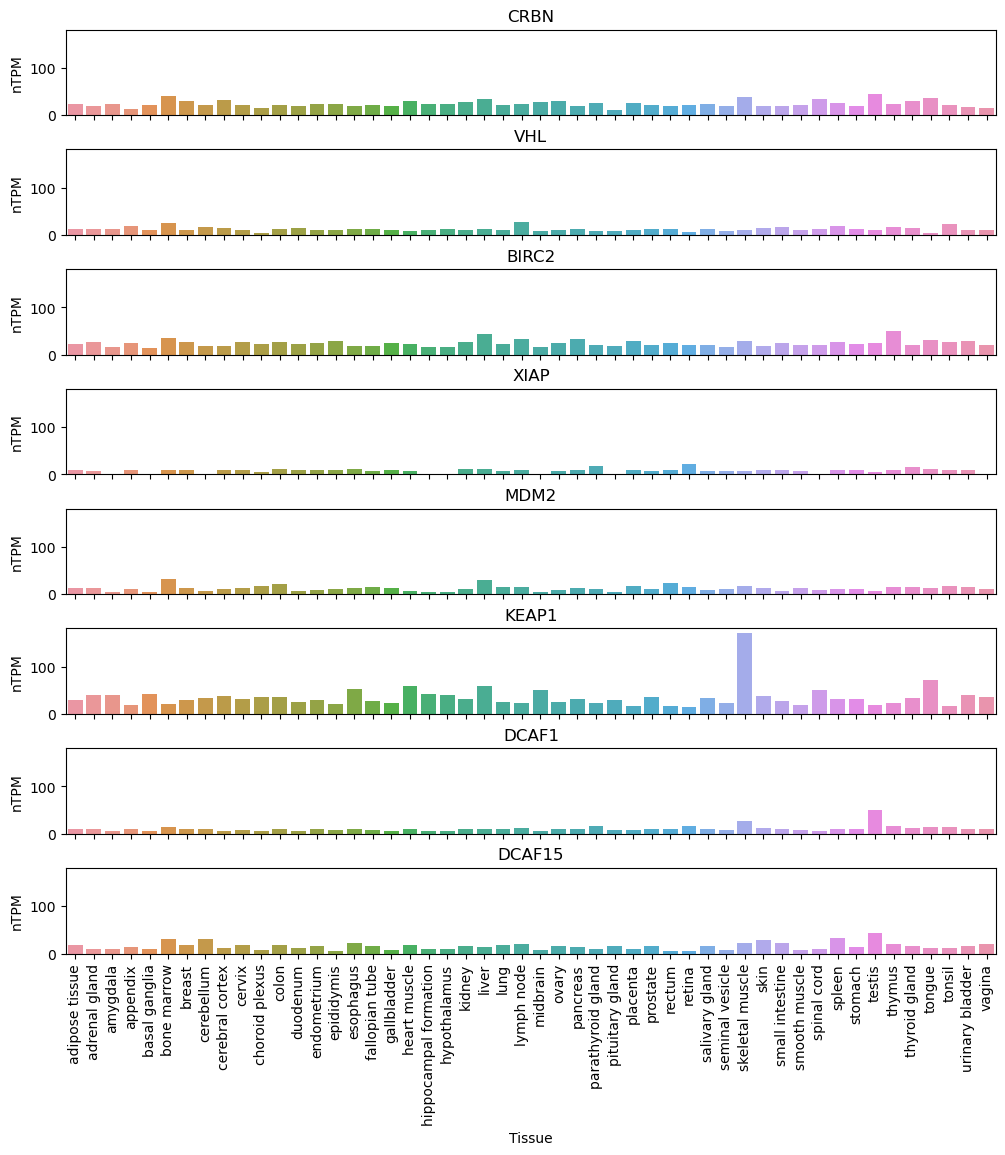

In [6]:
# We can do this for any E3 ligase of our choosing
# Review tissue expression profile of E3 ligases currently enabled with at least moderate affinity (KD < 1 uM) reversibly binding small molecule ligands.

def compare_list_expression(E3_list, df):
    length = len(E3_list)
    fig, ax = plt.subplots(figsize=(12, 12), nrows=length, ncols=1, sharey=True, sharex=True) # ax = [plot1, plot2]
    plt.subplots_adjust(hspace=0.4)

    for i, E3 in enumerate(E3_list):
        fil = df["Gene name"] == E3.upper() # | (tsv_read["Gene name"] == "CBLB")

        ax[i].tick_params(axis='x', labelrotation=90)
        ax[i].set_title(E3.upper())
        sns.barplot(
            data=tsv_read_Tissue[fil],
            x="Tissue",
            y="nTPM",
            ax=ax[i],
        )
        if i != length-1:
            ax[i].set_xlabel('')

# Review tissue expression profile of E3 ligases currently enabled with at least moderate affinity (KD < 1 uM) reversibly binding small molecule ligands.
compare_list_expression(["CRBN", "VHL", "BIRC2", "XIAP", "MDM2", "KEAP1", "DCAF1", "DCAF15"] , tsv_read_Tissue)

In [8]:
## Installing essential data packages ##


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch


## Importing data in TSV format from protein genome atlas ##

r_rna_single_cellTSV = 'https://www.proteinatlas.org/download/rna_single_cell_type.tsv.zip'
w_rna_single_cellTSV = 'https://www.proteinatlas.org/download/rna_single_cell_type.tsv.zip'
tsv_read_single_cell = pd.read_csv(r_rna_single_cellTSV, sep='\t')
print(tsv_read_single_cell.head(10))


              Gene Gene name                        Cell type   nTPM
0  ENSG00000000003    TSPAN6                       Adipocytes  147.5
1  ENSG00000000003    TSPAN6            Alveolar cells type 1    6.0
2  ENSG00000000003    TSPAN6            Alveolar cells type 2   10.9
3  ENSG00000000003    TSPAN6                       Astrocytes   13.6
4  ENSG00000000003    TSPAN6                          B-cells    1.5
5  ENSG00000000003    TSPAN6              Basal keratinocytes   12.7
6  ENSG00000000003    TSPAN6            Basal prostatic cells   14.0
7  ENSG00000000003    TSPAN6          Basal respiratory cells   74.1
8  ENSG00000000003    TSPAN6  Basal squamous epithelial cells   23.9
9  ENSG00000000003    TSPAN6                    Bipolar cells    0.6


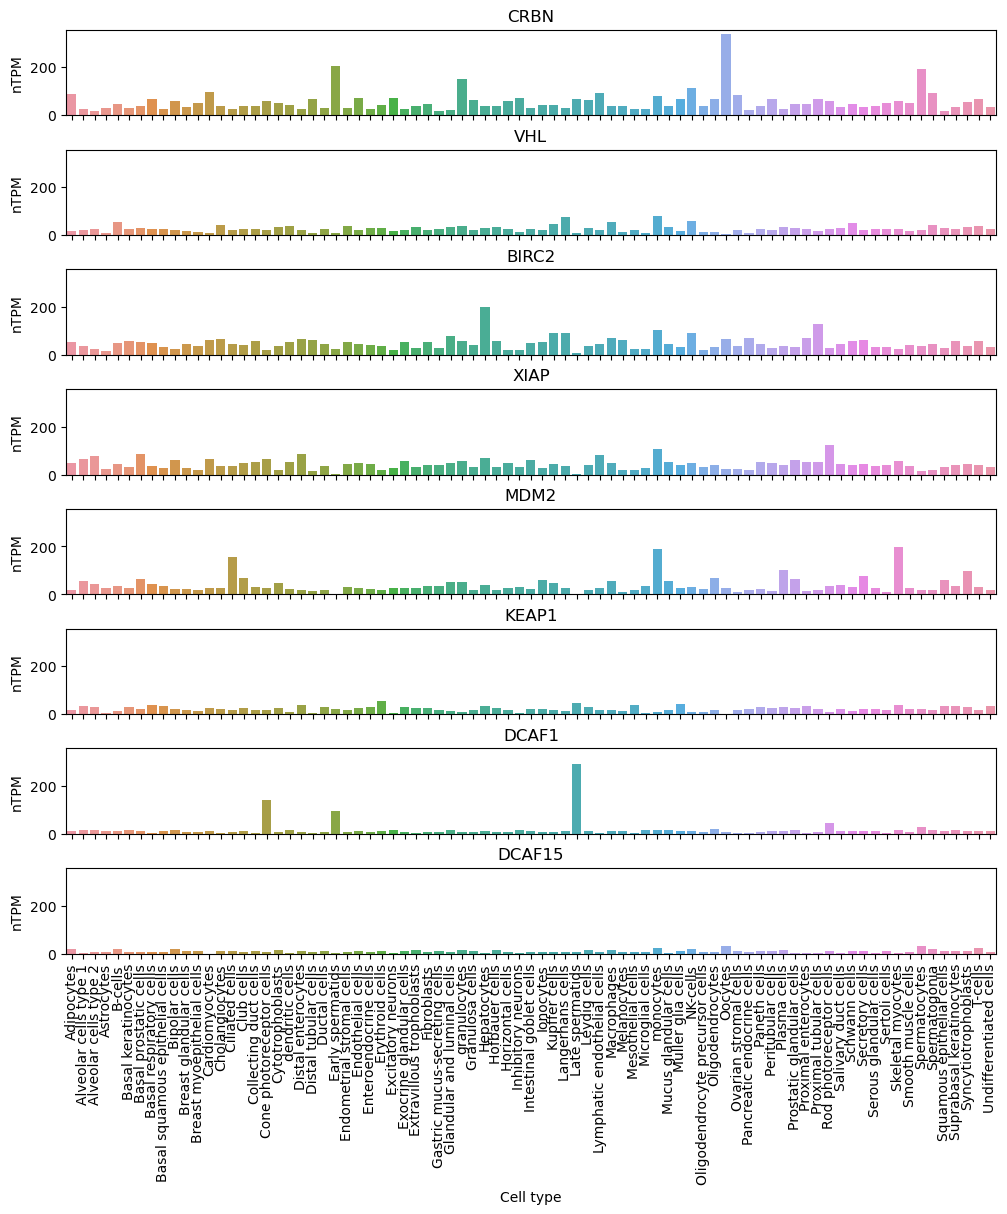

In [9]:
## Review tissue expression profile of E3 ligases currently enabled with at least moderate affinity (KD < 1 uM) reversibly binding small molecule ligands.
#Termed: 'Noncovalent_enabled_E3'

def compare_list_tissue_expression(E3_list, df):
    length = len(E3_list)
    fig, ax = plt.subplots(figsize=(12, 12), nrows=length, ncols=1, sharey=True, sharex=True) # ax = [plot1, plot2]
    plt.subplots_adjust(hspace=0.4)

    for i, E3 in enumerate(E3_list):
        fil = df["Gene name"] == E3.upper() # | (tsv_read["Gene name"] == "CRBN")

        ax[i].tick_params(axis='x', labelrotation=90)
        ax[i].set_title(E3.upper())
        sns.barplot(
            data=tsv_read_single_cell[fil],
            x="Cell type",
            y="nTPM",
            ax=ax[i],
        )
        if i != length-1:
            ax[i].set_xlabel('')

# compare_pair_expression of any E3 you choose("CRBN", "VHL", tsv_read).
compare_list_tissue_expression(["CRBN", "VHL", "BIRC2", "XIAP", "MDM2", "KEAP1", "DCAF1", "DCAF15"] , tsv_read_single_cell)

In [10]:
# We now both tissue ('tsv_read_Tissue') and cellular ('tsv_read_single_cell') expression data.

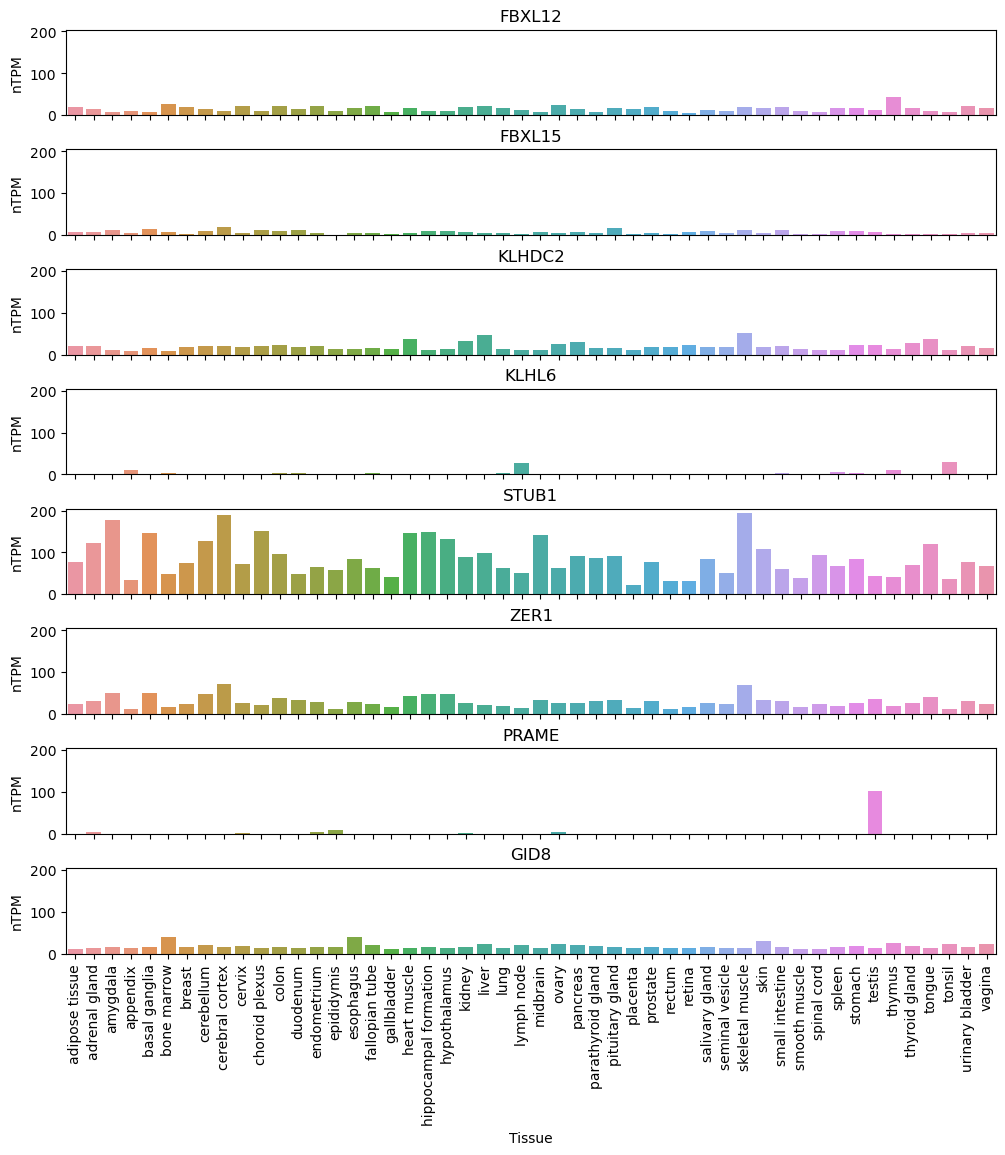

In [11]:
# We can do this for any E3 ligase of our choosing
# We can choose to print the tissue expression pattern of those prospectively discovered as effectors of degradation

def compare_list_expression(E3_list, df):
    length = len(E3_list)
    fig, ax = plt.subplots(figsize=(12, 12), nrows=length, ncols=1, sharey=True, sharex=True) # ax = [plot1, plot2]
    plt.subplots_adjust(hspace=0.4)

    for i, E3 in enumerate(E3_list):
        fil = df["Gene name"] == E3.upper() # | (tsv_read["Gene name"] == "CBLB")

        ax[i].tick_params(axis='x', labelrotation=90)
        ax[i].set_title(E3.upper())
        sns.barplot(
            data=tsv_read_Tissue[fil],
            x="Tissue",
            y="nTPM",
            ax=ax[i],
        )
        if i != length-1:
            ax[i].set_xlabel('')

## Review cellular expression profile of E3 ligases prospectively discovered as effectors of degradation: FBXL12, FBXL15, KLHDC2, KLHL6, STUB1, ZER1, PRAME, GID8.
compare_list_expression(["FBXL12", "FBXL15", "KLHDC2", "KLHL6", "STUB1", "ZER1", "PRAME", "GID8"] , tsv_read_Tissue)

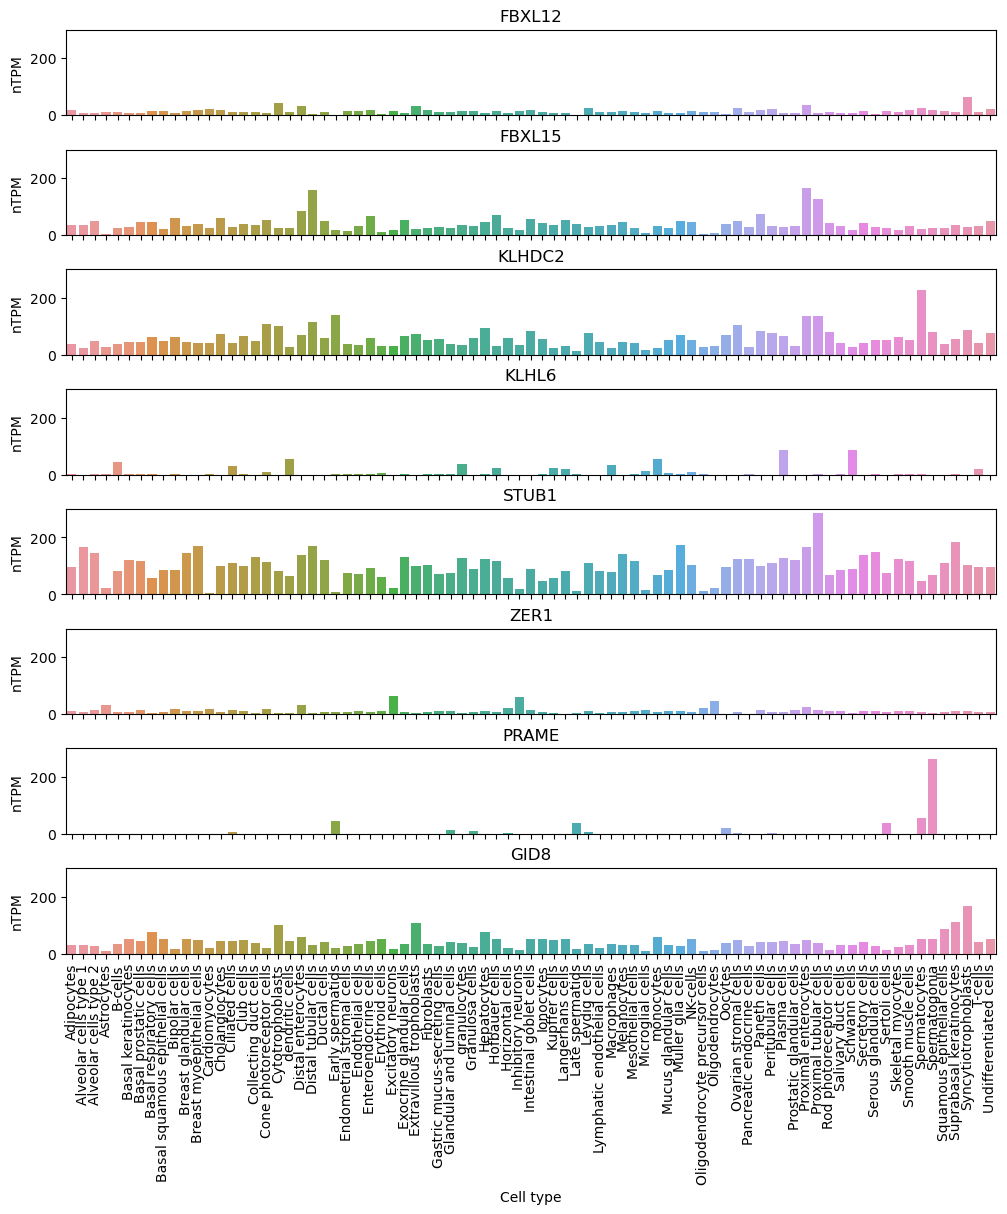

In [12]:
# We can then hone in on specific cell lines in high resolution for these ligases

def compare_list_expression(E3_list, df):
    length = len(E3_list)
    fig, ax = plt.subplots(figsize=(12, 12), nrows=length, ncols=1, sharey=True, sharex=True) # ax = [plot1, plot2]
    plt.subplots_adjust(hspace=0.4)

    for i, E3 in enumerate(E3_list):
        fil = df["Gene name"] == E3.upper() # | (tsv_read["Gene name"] == "CBLB")

        ax[i].tick_params(axis='x', labelrotation=90)
        ax[i].set_title(E3.upper())
        sns.barplot(
            data=tsv_read_single_cell[fil],
            x="Cell type",
            y="nTPM",
            ax=ax[i],
        )
        if i != length-1:
            ax[i].set_xlabel('')

## Review cellular expression profile of E3 ligases prospectively discovered as effectors of degradation: FBXL12, FBXL15, KLHDC2, KLHL6, STUB1, ZER1, PRAME, GID8.
compare_list_expression(["FBXL12", "FBXL15", "KLHDC2", "KLHL6", "STUB1", "ZER1", "PRAME", "GID8"] , tsv_read_single_cell)

Text(0.5, 1.0, 'KLHL6_cell_type_expression')

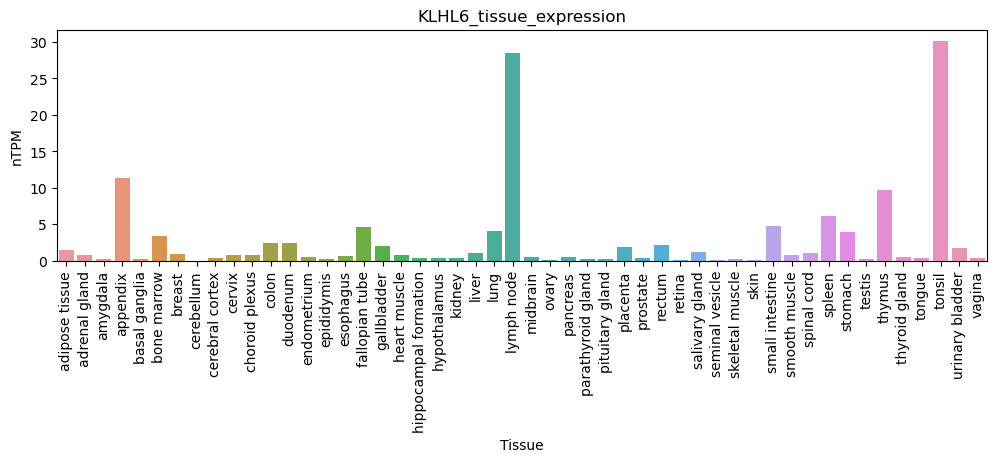

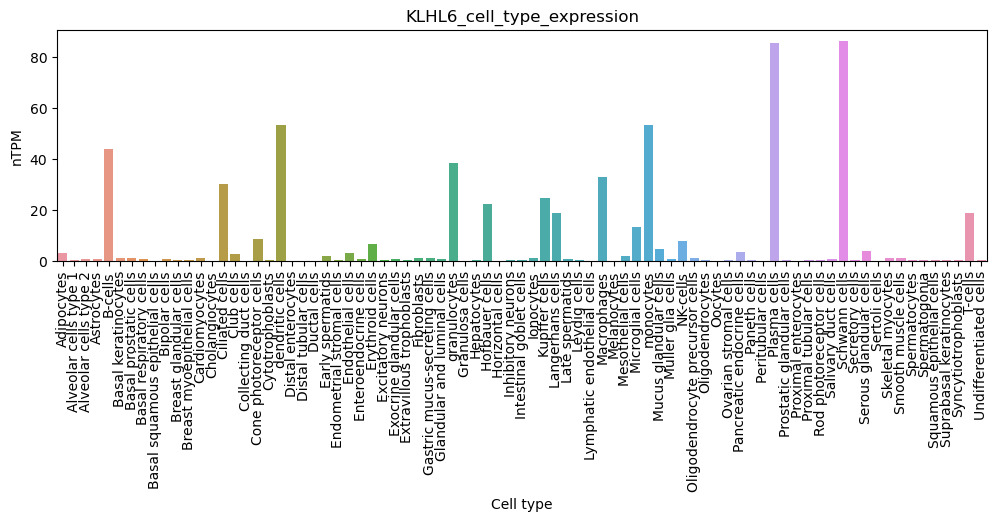

In [13]:
# If we wish, we can look at individual ligases.
# For example, E3 ligase: 'KLHL6' appears to have an interesting profile:

# We now both tissue ('tsv_read_Tissue') and cellular ('tsv_read_single_cell') expression data.

KLHL6_tsv_read_tissue_expression = tsv_read_Tissue["Gene name"] == "KLHL6"
KLHL6_tsv_read_rna_single_cell = tsv_read_single_cell["Gene name"] == "KLHL6"

#To view individual gene expression patterns - tissues
fig, ax = plt.subplots(figsize=(12, 3))

ax.tick_params(axis='x', labelrotation=90)
sns.barplot(
    data=tsv_read_Tissue[KLHL6_tsv_read_tissue_expression],
    x="Tissue",
    y="nTPM",
    ax=ax,
)
plt.title('KLHL6_tissue_expression')

#To view individual gene expression patterns - cell lines
fig, ax = plt.subplots(figsize=(12, 3))

ax.tick_params(axis='x', labelrotation=90)
sns.barplot(
    data=tsv_read_single_cell[KLHL6_tsv_read_rna_single_cell],
    x="Cell type",
    y="nTPM",
    ax=ax,
)
plt.title('KLHL6_cell_type_expression')



In [14]:
# Plotting both together builds a picture of specific expression in immunologically relavent cell types and tissues.
# this may offer a potential involvement in immunological cellular and tissue function.
# This may offer an opportunity  for specific recruitment in these tissues for tissue specific target degradation.
# High value drug targets could include BCL6 (B-cell lymp). 

In [15]:
## 3. Identify the 'best' E3 ligase for a pair of drug targets (A, B)

In [16]:
#Target A: TYMS - inhibition of TYMS carries known on-target cardiotoxicity
# aim of this expreiment is to identify an E3 ligase whose expression in key cardiomycytes is low.
# plan to search a list of E3's  for an E3 poorly expressed in Cardiomyocytes

In [17]:
#Create slice for Cardiomyocytes tissue:
#tsv_read_rna_single_cellTSV[tsv_read_rna_single_cellTSV["Cell type"] == "Cardiomyocytes"]
Cardiomyocytes = tsv_read_single_cell[tsv_read_single_cell["Cell type"] == "Cardiomyocytes"]
Cardiomyocytes

,Gene,Gene name,Cell type,nTPM
12,ENSG00000000003,TSPAN6,Cardiomyocytes,8.4
93,ENSG00000000005,TNMD,Cardiomyocytes,0.0
174,ENSG00000000419,DPM1,Cardiomyocytes,64.8
255,ENSG00000000457,SCYL3,Cardiomyocytes,4.6
336,ENSG00000000460,C1orf112,Cardiomyocytes,0.2
...,...,...,...,...
1626249,ENSG00000288677,HRURF,Cardiomyocytes,0.0
1626330,ENSG00000288678,ENSG00000288678,Cardiomyocytes,0.0
1626411,ENSG00000288681,ENSG00000288681,Cardiomyocytes,0.0
1626492,ENSG00000288684,ENSG00000288684,Cardiomyocytes,0.0


In [18]:
#To view expression of all E3 ligases of interest in cardiomyocytes (noncovalent_enabled, covalent_enabled, exploratory)
E3_ligase_list_cardiomyocyte_exp = Cardiomyocytes[Cardiomyocytes["Gene name"].isin(["CRBN", "VHL", "BIRC2", "XIAP", "MDM2", "KEAP1", "DCAF1", "DCAF15", "FBXL12", "FBXL15", "KLHDC2", "KLHL6", "STUB1", "ZER1", "PRAME", "GID8", "RNF4", "RNF114", "RNF126", "FEM1B", "FBXO22", "DCAF16", "DCAF11"])]
E3_ligase_list_cardiomyocyte_exp

,Gene,Gene name,Cell type,nTPM
69753,ENSG00000063978,RNF4,Cardiomyocytes,19.3
89436,ENSG00000070423,RNF126,Cardiomyocytes,17.1
119244,ENSG00000079999,KEAP1,Cardiomyocytes,24.3
192711,ENSG00000100897,DCAF11,Cardiomyocytes,35.9
197652,ENSG00000101193,GID8,Cardiomyocytes,20.3
208668,ENSG00000101966,XIAP,Cardiomyocytes,64.7
224220,ENSG00000103266,STUB1,Cardiomyocytes,4.5
277842,ENSG00000107872,FBXL15,Cardiomyocytes,25.3
302061,ENSG00000110330,BIRC2,Cardiomyocytes,62.3
339726,ENSG00000113851,CRBN,Cardiomyocytes,98.8


Text(0.5, 1.0, 'E3 expression in cardiomycocytes')

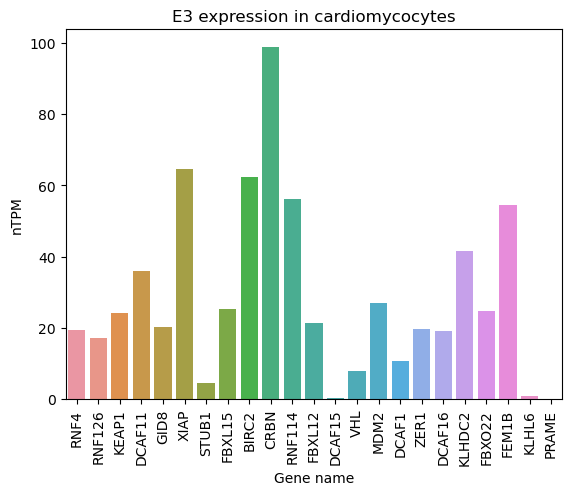

In [19]:
#To graph this
sns.barplot(
    data=E3_ligase_list_cardiomyocyte_exp,
    x="Gene name",
    y="nTPM",
)
plt.xticks(rotation=90
          
)
plt.title('E3 expression in cardiomycocytes')

In [20]:
# we can pull out the E3 with lowest expression from this dataset:
#Next we wish to identify the E3 ligase most highly expressed in the desired tissue.
index_of_min_E3_cardiomyocyte = E3_ligase_list_cardiomyocyte_exp["nTPM"].idxmin()
E3_ligase_list_cardiomyocyte_exp.loc[index_of_min_E3_cardiomyocyte]

Gene         ENSG00000185686
Gene name              PRAME
Cell type     Cardiomyocytes
nTPM                     0.1
Name: 1240689, dtype: object

Text(0.5, 1.0, 'PRAME_tissue_expression')

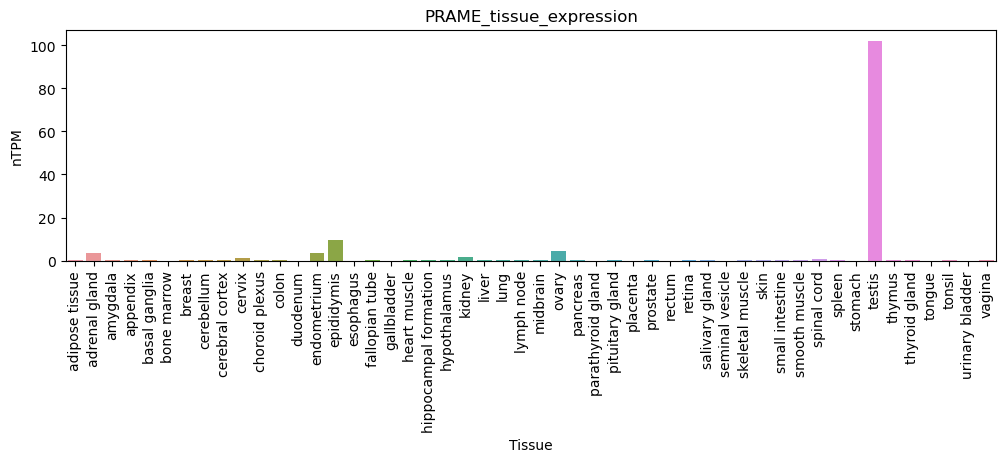

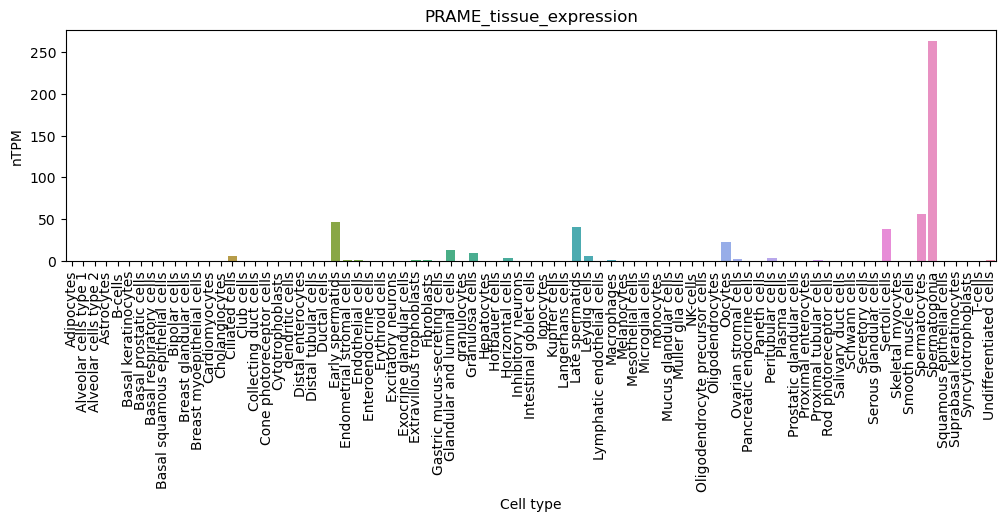

In [21]:
#This identifies E3 ligases PRAME as that from the set with the least expression in this specific cell type.
#we can then explore whether the cellular expression of PRAME is compatible with that necessary for efficacy:
# If we wish, we can look at individual ligases.
# For example, E3 ligase: 'KLHL6' appears to have an interesting profile:

# We now both tissue ('tsv_read_Tissue') and cellular ('tsv_read_single_cell') expression data.

PRAME_tsv_read_tissue_expression = tsv_read_Tissue["Gene name"] == "PRAME"
PRAME_tsv_read_rna_single_cell = tsv_read_single_cell["Gene name"] == "PRAME"

#To view individual gene expression patterns - tissues
fig, ax = plt.subplots(figsize=(12, 3))

ax.tick_params(axis='x', labelrotation=90)
sns.barplot(
    data=tsv_read_Tissue[PRAME_tsv_read_tissue_expression],
    x="Tissue",
    y="nTPM",
    ax=ax,
)
plt.title('PRAME_tissue_expression')

#To view individual gene expression patterns - cell lines
fig, ax = plt.subplots(figsize=(12, 3))

ax.tick_params(axis='x', labelrotation=90)
sns.barplot(
    data=tsv_read_single_cell[PRAME_tsv_read_rna_single_cell],
    x="Cell type",
    y="nTPM",
    ax=ax,
)
plt.title('PRAME_tissue_expression')



In [22]:
#PRAME appears to have an especially  restricted expression pattern. 
#Unless the target is testicularly expressed there may be little utility for a PRAME recruiting PROTAC.

In [23]:
#Instead we can visually identify the other E3s poorly expressed in cardiomyocytes which may offer an enhanced therapeutic window, but broader expression than PRAME:

Cardiomyocyte_sparing_E3_ligases = E3_ligase_list_cardiomyocyte_exp[E3_ligase_list_cardiomyocyte_exp["nTPM"] < 5 ]
Cardiomyocyte_sparing_E3_ligases

,Gene,Gene name,Cell type,nTPM
224220,ENSG00000103266,STUB1,Cardiomyocytes,4.5
521004,ENSG00000132017,DCAF15,Cardiomyocytes,0.2
1058034,ENSG00000172578,KLHL6,Cardiomyocytes,0.9
1240689,ENSG00000185686,PRAME,Cardiomyocytes,0.1


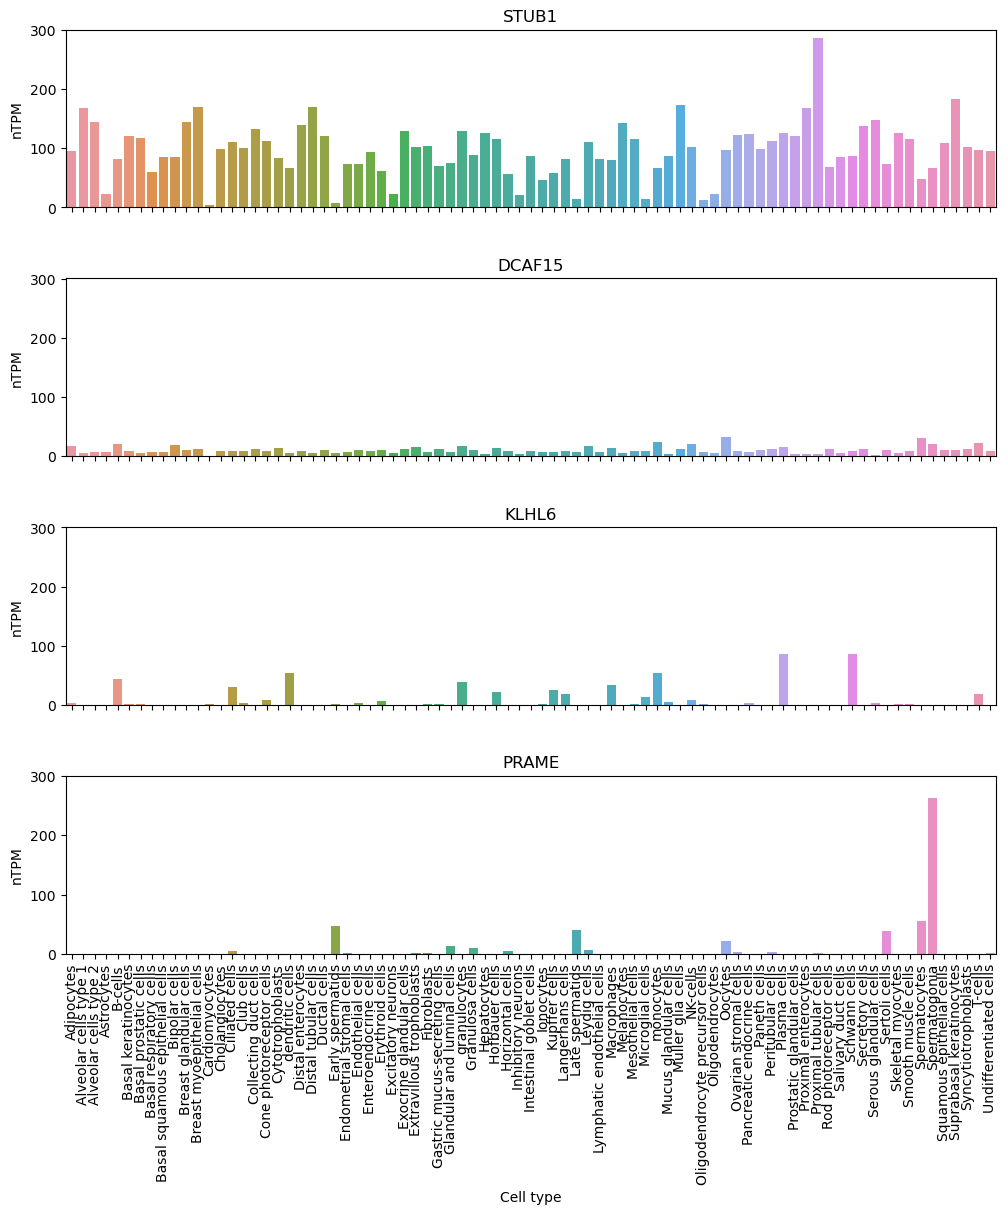

In [24]:
## Review cellular expression profile of cardiomyocyte sparing E3 ligases 

def compare_list_tissue_expression(E3_list, df):
    length = len(E3_list)
    fig, ax = plt.subplots(figsize=(12, 12), nrows=length, ncols=1, sharey=True, sharex=True) # ax = [plot1, plot2]
    plt.subplots_adjust(hspace=0.4)

    for i, E3 in enumerate(E3_list):
        fil = df["Gene name"] == E3.upper() # | (tsv_read["Gene name"] == "CRBN")

        ax[i].tick_params(axis='x', labelrotation=90)
        ax[i].set_title(E3.upper())
        sns.barplot(
            data=tsv_read_single_cell[fil],
            x="Cell type",
            y="nTPM",
            ax=ax[i],
        )
        if i != length-1:
            ax[i].set_xlabel('')

# compare_pair_expression of any E3 you choose("CRBN", "VHL", tsv_read).
compare_list_tissue_expression(["STUB1", "DCAF15", "KLHL6", "PRAME"] , tsv_read_single_cell)

In [25]:
#Based upon the above - STUB1 offers a broad expression profile while sparing cardiomyocytes and may offer an opportunity for tissue selectivity.

In [26]:
## 3. Identify the 'best' E3 ligase for a pair of drug targets (A, B).
#Target B: IRAK4 - which we want to degrade in the skin.

#First we need to look at IRAK4 expression:
#Create slice for IRAK4:

IRAK4 = tsv_read_Tissue[tsv_read_Tissue["Gene name"] == "IRAK4"]
IRAK4

,Gene,Gene name,Tissue,nTPM
830424,ENSG00000198001,IRAK4,adipose tissue,8.2
830425,ENSG00000198001,IRAK4,adrenal gland,6.2
830426,ENSG00000198001,IRAK4,amygdala,3.4
830427,ENSG00000198001,IRAK4,appendix,8.0
830428,ENSG00000198001,IRAK4,basal ganglia,3.7
830429,ENSG00000198001,IRAK4,bone marrow,2.8
830430,ENSG00000198001,IRAK4,breast,8.0
830431,ENSG00000198001,IRAK4,cerebellum,1.9
830432,ENSG00000198001,IRAK4,cerebral cortex,2.7
830433,ENSG00000198001,IRAK4,cervix,7.5


Text(0.5, 1.0, 'IRAK4_expression')

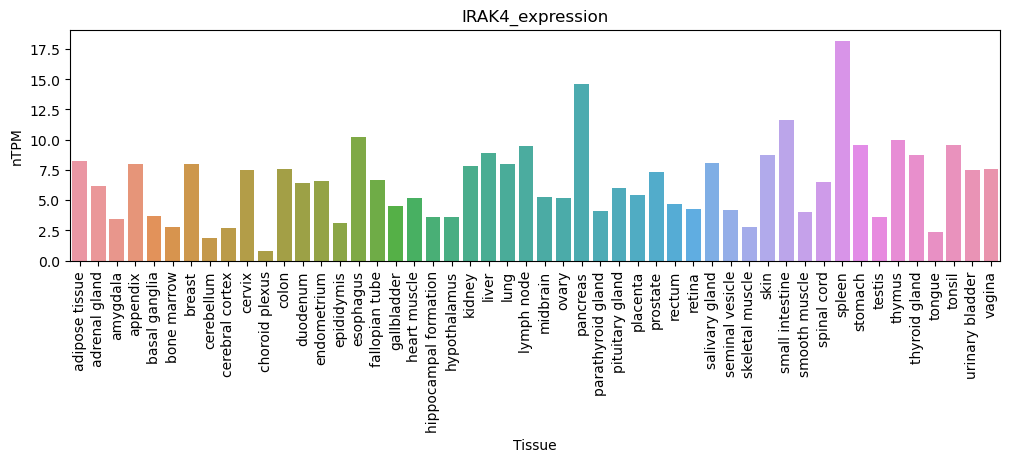

In [27]:
#We can graph this: 
#To view individual gene expression patterns - tissue expression patterns. 
fig, ax = plt.subplots(figsize=(12, 3))

ax.tick_params(axis='x', labelrotation=90)
sns.barplot(
    data=IRAK4,
    x="Tissue",
    y="nTPM",
    ax=ax,
)
plt.title('IRAK4_expression')

In [28]:
#We wish to degrade IRAK4 in the skin - so will compare expression of E3 ligase genes in the skin (only)
#Create slice for skin tissue:

skin = tsv_read_Tissue[tsv_read_Tissue["Tissue"] == "skin"]
skin

,Gene,Gene name,Tissue,nTPM
37,ENSG00000000003,TSPAN6,skin,9.3
87,ENSG00000000005,TNMD,skin,3.0
137,ENSG00000000419,DPM1,skin,31.8
187,ENSG00000000457,SCYL3,skin,7.5
237,ENSG00000000460,C1orf112,skin,2.4
...,...,...,...,...
999861,ENSG00000291313,ENSG00000291313,skin,0.0
999902,ENSG00000291314,ENSG00000291314,skin,0.0
999943,ENSG00000291315,ENSG00000291315,skin,0.0
999984,ENSG00000291316,ENSG00000291316,skin,4.8


In [29]:
#To look specifically only at the E3 ligases of interest:
E3_skin = skin[skin["Gene name"].isin(["CRBN", "VHL", "BIRC2", "XIAP", "MDM2", "KEAP1", "DCAF1", "DCAF15", "FBXL12", "FBXL15", "KLHDC2", "KLHL6", "STUB1", "ZER1", "PRAME", "GID8", "RNF4", "RNF114", "RNF126", "FEM1B", "FBXO22", "DCAF16", "DCAF11"])]
E3_skin

,Gene,Gene name,Tissue,nTPM
43087,ENSG00000063978,RNF4,skin,28.7
55237,ENSG00000070423,RNF126,skin,43.9
73637,ENSG00000079999,KEAP1,skin,37.4
118978,ENSG00000100897,DCAF11,skin,19.5
122028,ENSG00000101193,GID8,skin,29.5
128819,ENSG00000101966,XIAP,skin,8.5
138419,ENSG00000103266,STUB1,skin,108.1
171519,ENSG00000107872,FBXL15,skin,5.3
186469,ENSG00000110330,BIRC2,skin,17.7
209719,ENSG00000113851,CRBN,skin,18.9


Text(0.5, 1.0, 'E3_skin_expression')

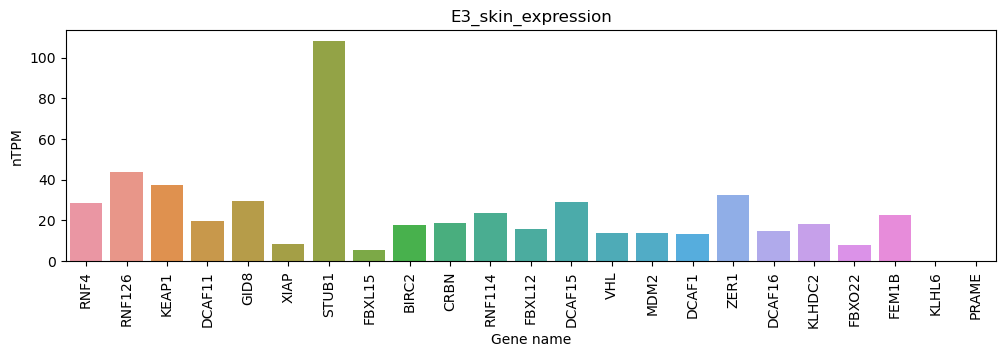

In [30]:
#We can graph this: 
#To view individual gene expression patterns - cell lines
fig, ax = plt.subplots(figsize=(12, 3))

ax.tick_params(axis='x', labelrotation=90)
sns.barplot(
    data=E3_skin,
    x="Gene name",
    y="nTPM",
    ax=ax,
)
plt.title('E3_skin_expression')

In [31]:
#Next we wish to identify the E3 ligase most highly expressed in the desired tissue.
index_of_max_E3_skin = E3_skin["nTPM"].idxmax()
E3_skin.loc[index_of_max_E3_skin]

Gene         ENSG00000103266
Gene name              STUB1
Tissue                  skin
nTPM                   108.1
Name: 138419, dtype: object

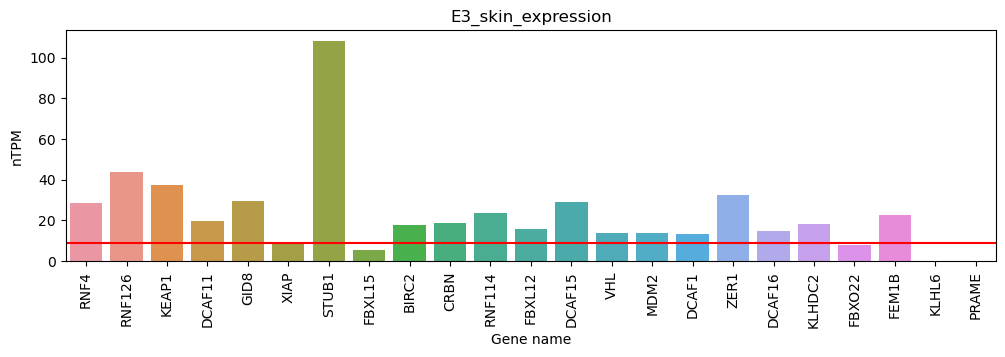

In [32]:
#We can graph this: 
#To view individual gene expression patterns - cell lines

fig, ax = plt.subplots(figsize=(12, 3))

ax.tick_params(axis='x', labelrotation=90)
sns.barplot(
    data=E3_skin,
    x="Gene name",
    y="nTPM",
    ax=ax,
)
plt.title('E3_skin_expression')
plt.axhline(y=8.7, color='r', linestyle='-')
plt.show()
